In [31]:
library(tidyverse)

data <- read_csv("https://raw.githubusercontent.com/nkim0/Group-Project/main/injury_data.csv", show_col_types=FALSE)

# Title:

Group proposal of injury prediction based on player’s weight and training intensity


# Introduction:
Involvement in competitive sports is associated with a risk of experiencing a sport-specific injury and its prevalence has been affecting athletes, coaches, therapists, and sport organizers (Lemoyne, 2017). Although there are many health and psychological benefits in participating in physical activities, there is growing concern regarding player safety and injury prevention in competitive sport settings (Maffulli, 2011). This project uses a synthetic dataset designed for injury prediction to explore the relationship between different variables and whether or not future injury is predicted. The dataset includes variables such as player demographics (age, weight, and height), training intensities, recovery times, and previous injury histories to establish a correlation to the possibility of injury in the future. The dataset does not provide information on the type of injury, but rather the “yes” or “no” possibility of athletes experiencing a sport-specific injury according to player attributes and features. In our project, we aim to address the question: ‘Can we predict whether or not a player will experience an injury based on their weight and training intensity?’ using the dataset described.


# Preliminary exploratory data analysis:
For the preliminary data analysis, we will primarily select the columns player_weight, training_intensity, and likelihood_of_injury. We will then create a summary table of the likelihood_of_injury to make sure the predicted injury quantity is the similar amount as predicted no injury for balanced classification data. Additionally, filter any rows with missing values for any collumn.

In [32]:
tidy_data <- data |>
    select(Player_Weight, Training_Intensity, Likelihood_of_Injury) |>
    filter(!is.na(Player_Weight) & !is.na(Training_Intensity) & !is.na(Likelihood_of_Injury)) |>
    mutate(Likelihood_of_Injury = as_factor(Likelihood_of_Injury))
# tidy_data$Likelihood_of_Injury <- recode_factor(tidy_data$Likelihood_of_Injury,
#                                                TRUE=1,
#                                                FALSE=0)
    
injury_prediction_summary <- tidy_data |>
    group_by(Likelihood_of_Injury) |>
    summarize(count = n())
head(tidy_data)

Player_Weight,Training_Intensity,Likelihood_of_Injury
<dbl>,<dbl>,<fct>
66.25193,0.4579290,0
70.99627,0.2265216,1
80.09378,0.6139703,1
87.47327,0.2528581,1
84.65922,0.5776318,1
75.82055,0.3592087,0


We can see Likelihood of injury have balanced counts and we can continue. Lastly, we will plot the weight vs. training_intensity, with the color of the points based on injured or not prediction.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


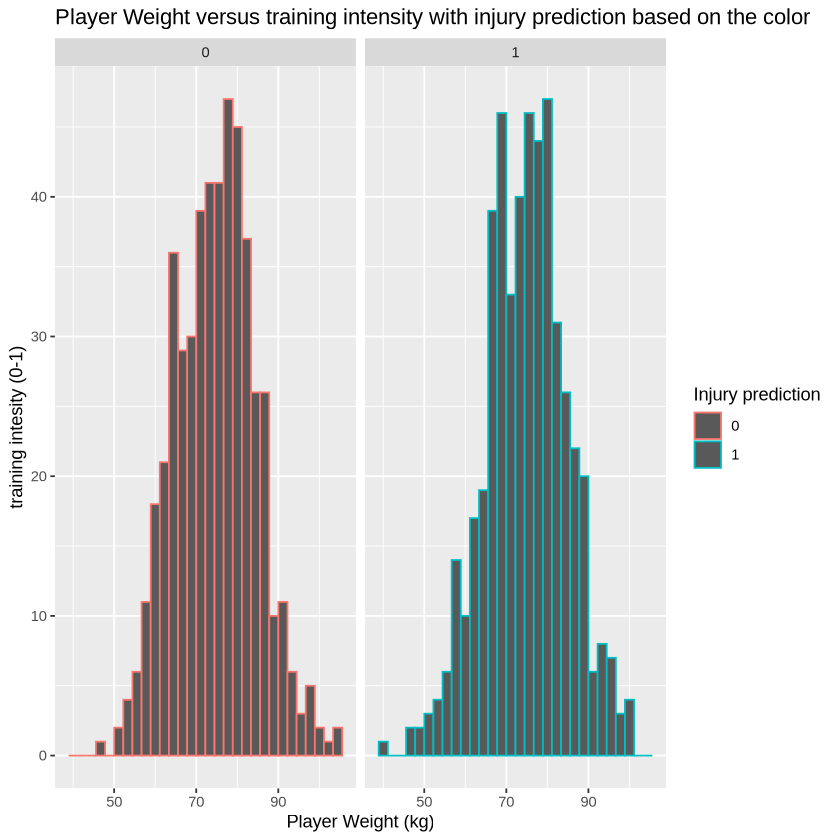

In [45]:
preliminary_plot <- tidy_data |>
    ggplot(aes(x=Player_Weight, color=Likelihood_of_Injury)) +
    geom_histogram() +
    facet_grid(cols = vars(Likelihood_of_Injury)) +
    ggtitle("Player Weight versus training intensity with injury prediction based on the color") +
    labs(x="Player Weight (kg)", y="training intesity (0-1)", color="Injury prediction")

preliminary_plot

# Methods:
For the data analysis, we will use k-nn classification engine to predict injury. We will primarily split the data to training and testing sets using 75/25 split. For the model, the recipe takes player_weight and training_intensity as predictors and predicts whether they will experience injury or not. Additionally, the training data will be centered and standardized for balanced classification. Furthermore, we will use the vfold function and tune() in our workflow to find the best k value to use for the most accurate model.

# Expected outcomes and significance:
We expect to find which specific value for both “weight of players” and “intensity of training” will frequently cause the most injury. These outcomes can allow the players to participate in the game with caution as much as possible, especially those who fall into the data outcomes and play competitive sports. For example, if we get the result that less than 70 kg has a higher chance of having injuries, players might want to fit in the range of weight that has less injury rate. Moreover, we might want to reduce the training time for players to prevent severe injuries caused by sports or by setting the maximum training time per day based on the predictions we made with the results. Not only can we anticipate further injuries which is a major problem that is not avoidable for sports players. Since these outcomes are general, it is possible to analyze and lead to the prevention of further injury in detail for specific sports such as jiu-jitsu, badminton, etc by setting regulations or matching players based on their weight, height, and more to prevent injury realistically for each distinct sport. In addition, we could also predict the number of first-aid helpers needed to aid players by the outcomes.


# References:
Lemoyne, J., Poulin, C., Richer, N., & Bussières, A. (2017). Analyzing injuries among university-level athletes: Prevalence, patterns and risk factors. The Journal of the Canadian Chiropractic Association, 61(2), 88–95. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5596969/

Maffulli, N., Longo, U. G., Gougoulias, N., Caine, D., & Denaro, V. (2011). Sport injuries: A 
review of outcomes. British Medical Bulletin, 97(1), 47–80. https://doi.org/10.1093/bmb/ldq026

MrSimple07. (2024). Injury prediction dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/7691337